In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import spearmanr

Regression GHG and GDP

/hkfs/home/haicore/hgf_dlr/hgf_uyx7543/myEnv/lib64/python3.9/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                            Generalized Linear Model Regression Results                            
Dep. Variable:     Accumulation CO₂ emissions (per capita)   No. Observations:                  132
Model:                                                 GLM   Df Residuals:                      130
Model Family:                             NegativeBinomial   Df Model:                            1
Link Function:                                         Log   Scale:                          1.0000
Method:                                               IRLS   Log-Likelihood:                -817.88
Date:                                     Mon, 10 Mar 2025   Deviance:                       278.94
Time:                                             09:41:26   Pearson chi2:                 2.40e+03
No. Iterations:                                          9   Pseudo R-squ. (CS):             0.1867
Covariance Type:                                 nonrobust                                         


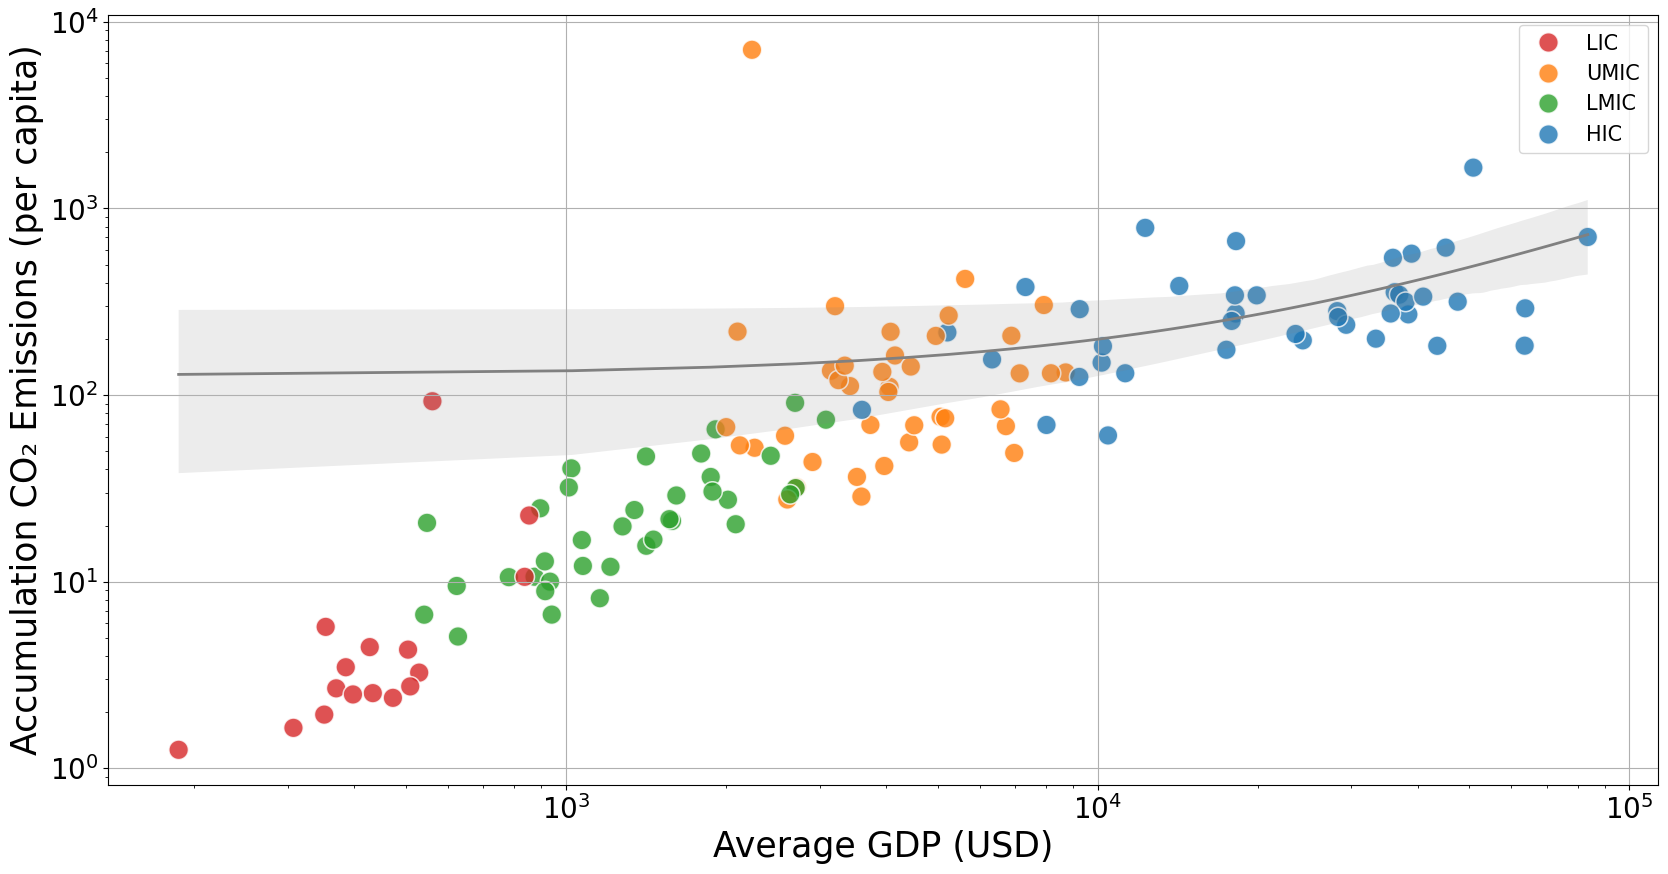

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib.patches import Rectangle

# Load the datasets

df = pd.read_csv('Average_gdp.csv')

df5 = pd.read_csv('High_income_income_co2_capita_1990_2022.csv')
df6 = pd.read_csv('Upper_middle_income_co2_capita_1990_2022.csv')
df7 = pd.read_csv('Lower_middle_income_co2_capita_1990_2022.csv')
df8 = pd.read_csv('Low_income_co2_capita_1990_2022.csv')

Df = pd.concat([df5, df6, df7, df8])

# Merge the datasets on the 'Entity' column
merged_df = pd.merge(df, Df, on='Entity')

# Select relevant columns and add an income category column
data = merged_df[['GDP', 'Accumulation CO₂ emissions (per capita)', 'Income_y','Entity']].dropna()

# Define the independent and dependent variables
X = data['GDP']
y = data['Accumulation CO₂ emissions (per capita)']

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the Negative Binomial regression model
nb_model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()

# Print the summary of the model, including the exact p-value
summary = nb_model.summary()
print(summary)

# Create the scatter plot
plt.figure(figsize=(20, 10))


# Define a color palette for the income categories using nature-friendly colors
palette = {
    'HIC': '#1f77b4',  # Blue
    'UMIC': '#ff7f0e',  # Orange
    'LMIC': '#2ca02c',  # Green
    'LIC': '#d62728'  # Red
}

# Create a scatter plot with color based on income category
sns.scatterplot(data=data, x='GDP', y='Accumulation CO₂ emissions (per capita)', 
                hue='Income_y', palette=palette, s=200, alpha=0.8)

# Add a regression line
sns.regplot(data=data, x='GDP', y='Accumulation CO₂ emissions (per capita)', 
            scatter=False, color='grey', line_kws={"linewidth": 2})


# Adding legend to display labels
plt.legend(fontsize=15)

# Add titles and labels
plt.xlabel('Average GDP (USD)', fontsize=25)
plt.ylabel('Accumulation CO₂ Emissions (per capita)', fontsize=25)

# Increase tick label sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xscale('log')  # Optional: Use logarithmic scale for better visualization
plt.yscale('log')  # Optional: Use logarithmic scale for better visualization
plt.grid(True)
plt.savefig('1_plot.png', bbox_inches='tight')  # Save with tight bounding box
plt.show()  # Show the plot


Correlation between GDP and Predicted CO₂ Emissions: 0.9572513343641709


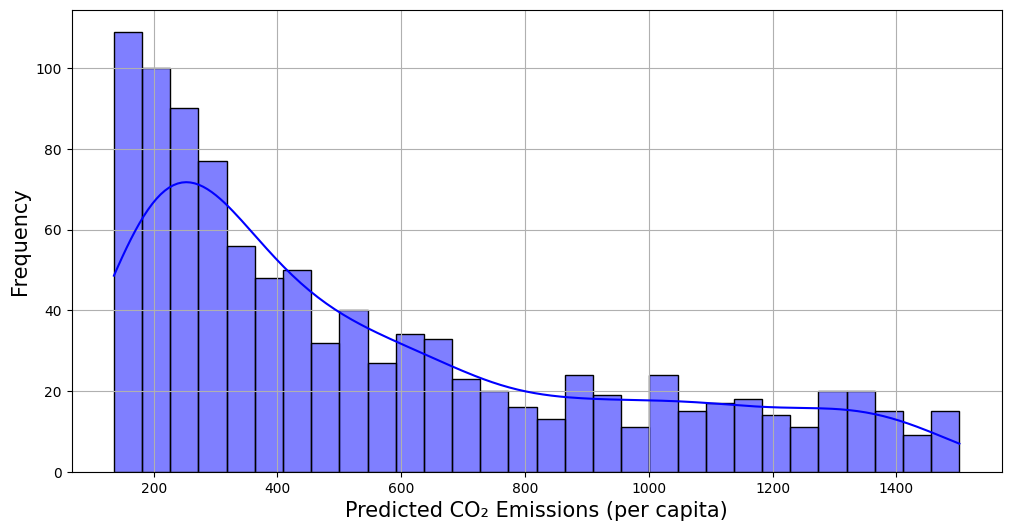

In [4]:
# Number of iterations for the Monte Carlo simulation
n_iterations = 1000

# Generate random GDP values based on the existing data
gdp_min = data['GDP'].min()
gdp_max = data['GDP'].max()
random_gdp = np.random.uniform(gdp_min, gdp_max, n_iterations)

# Prepare a DataFrame for the random GDP values
random_df = pd.DataFrame({'GDP': random_gdp})

# Add a constant for the intercept
random_X = sm.add_constant(random_df)

# Predict CO₂ emissions using the fitted Poisson model
predicted_emissions = nb_model.predict(random_X)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Random GDP': random_gdp,
    'Predicted CO₂ Emissions': predicted_emissions
})

correlation = results_df['Random GDP'].corr(results_df['Predicted CO₂ Emissions'])
print(f'Correlation between GDP and Predicted CO₂ Emissions: {correlation}')

# Plotting the results
plt.figure(figsize=(12, 6))
sns.histplot(results_df['Predicted CO₂ Emissions'], bins=30, kde=True, color='blue')
#plt.title('Distribution of Predicted CO₂ Emissions from Monte Carlo Simulation', fontsize=20)
plt.xlabel('Predicted CO₂ Emissions (per capita)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.savefig('REGRESSION GDP_vs_CO2')
plt.grid(True)
plt.show()

Loss and damage FUND

GHG threshold

In [11]:

# Load the datasets
df1 = pd.read_csv('High_income_income_co2_capita_1990_2022.csv')
df2 = pd.read_csv('Upper_middle_income_co2_capita_1990_2022.csv')
df3 = pd.read_csv('Lower_middle_income_co2_capita_1990_2022.csv')
df4 = pd.read_csv('Low_income_co2_capita_1990_2022.csv')


# Calculate the median of the CO2_2022 accumulation column for each DataFrame
median_co2_2022 = [
    df1['Accumulation CO₂ emissions (per capita)'].median(),
    df2['Accumulation CO₂ emissions (per capita)'].median(),
    df3['Accumulation CO₂ emissions (per capita)'].median(),
    df4['Accumulation CO₂ emissions (per capita)'].median()
]

# Calculate the overall median for 1967 and 2022
overall_median_co2_2022 = pd.Series(median_co2_2022).median()

# Print the results
print("GHG Threshold (Overall Median GDP):", overall_median_co2_2022)

GHG Threshold (Overall Median GDP): 64.1371674925


Economic Vulnerability Threshold

In [12]:

# Load the data
df = pd.read_csv('Average_gdp.csv')

# Calculate the median GDP for each income category
median_gdp_by_income = df.groupby('Income')['GDP'].median()

# Calculate the overall median GDP across all categories
overall_median_gdp = median_gdp_by_income.mean()

# Print the results
print("Median GDP by Income Category:")
print(median_gdp_by_income)
print("Economic Vulnerability Threshold (Overall Median GDP):", overall_median_gdp)

Median GDP by Income Category:
Income
HIC     23936.965677
LIC       430.868125
LMIC     1312.361368
UMIC     4051.854213
Name: GDP, dtype: float64
Economic Vulnerability Threshold (Overall Median GDP): 7433.01234574379


Regression EFD and GHG

/hkfs/home/haicore/hgf_dlr/hgf_uyx7543/myEnv/lib64/python3.9/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                          Generalized Linear Model Regression Results                          
Dep. Variable:     Total Damage per Country ('000 US$)   No. Observations:                  132
Model:                                             GLM   Df Residuals:                      130
Model Family:                         NegativeBinomial   Df Model:                            1
Link Function:                                     Log   Scale:                          1.0000
Method:                                           IRLS   Log-Likelihood:                -3248.4
Date:                                 Mon, 10 Mar 2025   Deviance:                       831.36
Time:                                         11:08:12   Pearson chi2:                 2.04e+03
No. Iterations:                                    100   Pseudo R-squ. (CS):             0.3832
Covariance Type:                             nonrobust                                         
                                        

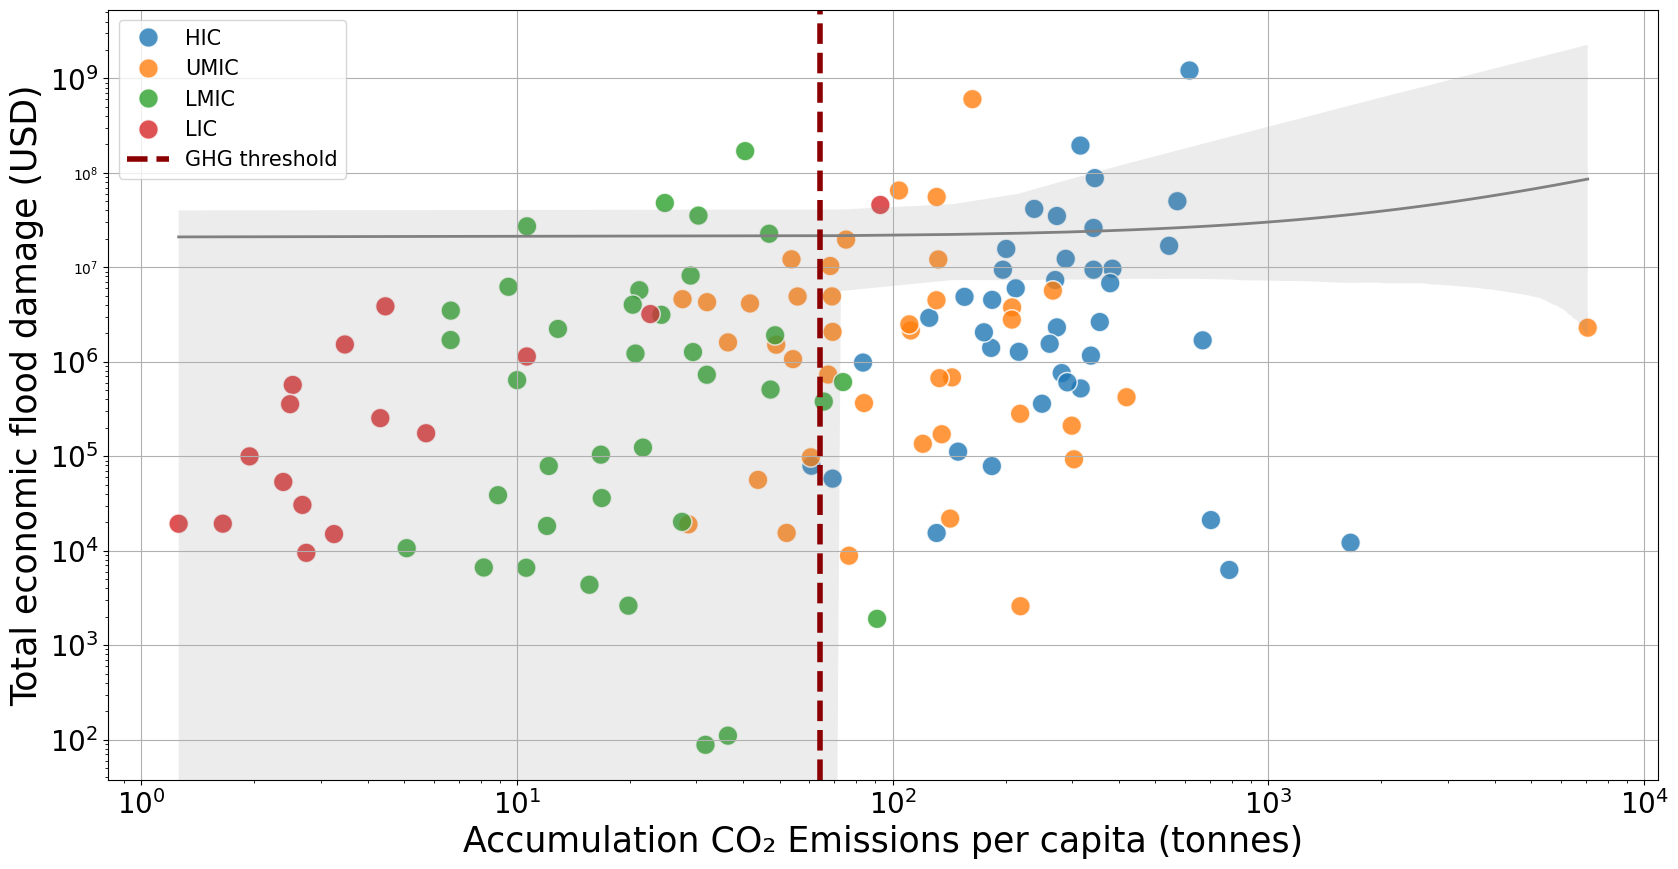

In [23]:
# Load the datasets
df1 = pd.read_csv('High_income_total_damage_per_country_1990_2022.csv')
df2 = pd.read_csv('Upper_middle_income_total_damage_per_country_1990_2022.csv')
df3 = pd.read_csv('Lower_middle_income_total_damage_per_country_1990_2022.csv')
df4 = pd.read_csv('Low_income_total_damage_per_country_1990_2022.csv')

df = pd.concat([df1, df2, df3, df4])

df5 = pd.read_csv('High_income_income_co2_capita_1990_2022.csv')
df6 = pd.read_csv('Upper_middle_income_co2_capita_1990_2022.csv')
df7 = pd.read_csv('Lower_middle_income_co2_capita_1990_2022.csv')
df8 = pd.read_csv('Low_income_co2_capita_1990_2022.csv')

Df = pd.concat([df5, df6, df7, df8])

# Merge the datasets on the 'Entity' column
merged_df = pd.merge(df, Df, on='Entity')

# Select relevant columns and add an income category column
data = merged_df[['Total Damage per Country (\'000 US$)', 'Accumulation CO₂ emissions (per capita)', 'Income_y','Entity']].dropna()

# Define the independent and dependent variables
X = data['Accumulation CO₂ emissions (per capita)']
y = data['Total Damage per Country (\'000 US$)'] * 1000

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the Negative Binomial regression model
nb_model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()

# Print the summary of the model, including the exact p-value
summary = nb_model.summary()
print(summary)

# Create the scatter plot
plt.figure(figsize=(20, 10))

# Define a color palette for the income categories using nature-friendly colors
palette = {
    'HIC': '#1f77b4',  # Blue
    'UMIC': '#ff7f0e',  # Orange
    'LMIC': '#2ca02c',  # Green
    'LIC': '#d62728'  # Red
}

# Create a scatter plot with color based on income category
sns.scatterplot(data=data, y='Total Damage per Country (\'000 US$)', x='Accumulation CO₂ emissions (per capita)', 
                hue='Income_y', palette=palette, s=200, alpha=0.8)

# Add a regression line
sns.regplot(data=data, y='Total Damage per Country (\'000 US$)', x='Accumulation CO₂ emissions (per capita)', scatter=False, color='grey', line_kws={"linewidth": 2})

# Adding vertical line for reference
plt.axvline(x=64, color='darkred', linestyle='--', label='GHG threshold', linewidth=4)

# Adding legend to display labels
plt.legend(fontsize=15)

# Add titles and labels
plt.xlabel('Accumulation CO₂ Emissions per capita (tonnes)', fontsize=25)
plt.ylabel('Total economic flood damage (USD)', fontsize=25)

# Increase tick label sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xscale('log')  # Optional: Use logarithmic scale for better visualization
plt.yscale('log')  # Optional: Use logarithmic scale for better visualization
plt.grid(True)

# Save the plot
plt.savefig('1_plot.png', bbox_inches='tight')

# Count the number of countries below the threshold for each income category
threshold = 64
below_threshold_counts = data[data['Accumulation CO₂ emissions (per capita)'] < threshold].groupby('Income_y').size()

# Print the counts and the names of the countries below the threshold
for income_category, count in below_threshold_counts.items():
    countries_below_threshold = data[(data['Income_y'] == income_category) & 
                                     (data['Accumulation CO₂ emissions (per capita)'] < threshold)]['Entity']
    print(f"{count} out of {data[data['Income_y'] == income_category].shape[0]} {income_category} countries are below the threshold.")
    print(f"Countries below the threshold for {income_category}: {', '.join(countries_below_threshold)}")

Correlation between GDP and Predicted CO₂ Emissions: 0.4906605616971945


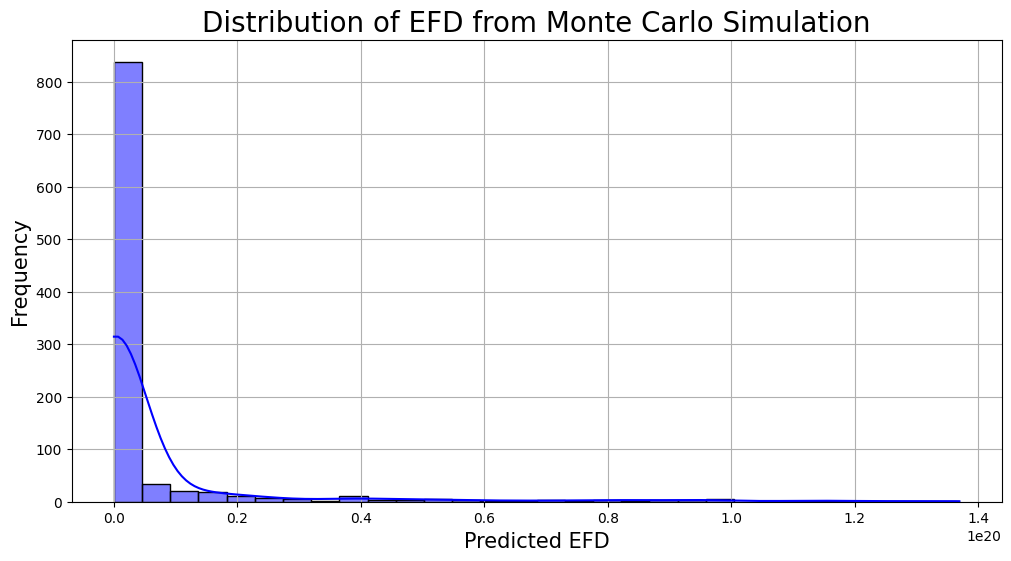

In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is a DataFrame with the column 'Accumulation CO₂ emissions (per capita)'
# Number of iterations for the Monte Carlo simulation
n_iterations = 1000

# Generate random CO₂ emission values based on the existing data
co2_min = data['Accumulation CO₂ emissions (per capita)'].min()
co2_max = data['Accumulation CO₂ emissions (per capita)'].max()
random_co2 = np.random.uniform(co2_min, co2_max, n_iterations)

# Prepare a DataFrame for the random CO₂ emission values
random_df = pd.DataFrame({'Accumulation CO₂ emissions (per capita)': random_co2})

# Add a constant for the intercept (required for statsmodels)
random_X = sm.add_constant(random_df)

# Predict EFD (Expected Frequency Distribution) using the fitted Poisson model
# Ensure 'nb_model' is a previously fitted Poisson regression model
predicted_efd = nb_model.predict(random_X)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Random CO₂ Emissions': random_co2,
    'Predicted EFD': predicted_efd
})

correlation = results_df['Random CO₂ Emissions'].corr(results_df['Predicted EFD'])
print(f'Correlation between GDP and Predicted CO₂ Emissions: {correlation}')

# Plotting the results
plt.figure(figsize=(12, 6))
sns.histplot(results_df['Predicted EFD'], bins=30, kde=True, color='blue')
plt.title('Distribution of EFD from Monte Carlo Simulation', fontsize=20)
plt.xlabel('Predicted EFD', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True)
plt.savefig('EFD_vs_CO2.png')
plt.show()

Regression EFD and GDP

/hkfs/home/haicore/hgf_dlr/hgf_uyx7543/myEnv/lib64/python3.9/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                          Generalized Linear Model Regression Results                          
Dep. Variable:     Total Damage per Country ('000 US$)   No. Observations:                  132
Model:                                             GLM   Df Residuals:                      130
Model Family:                         NegativeBinomial   Df Model:                            1
Link Function:                                     Log   Scale:                          1.0000
Method:                                           IRLS   Log-Likelihood:                -3235.4
Date:                                 Wed, 12 Mar 2025   Deviance:                       805.35
Time:                                         11:40:09   Pearson chi2:                 2.88e+03
No. Iterations:                                     22   Pseudo R-squ. (CS):             0.4936
Covariance Type:                             nonrobust                                         
                 coef    std err        

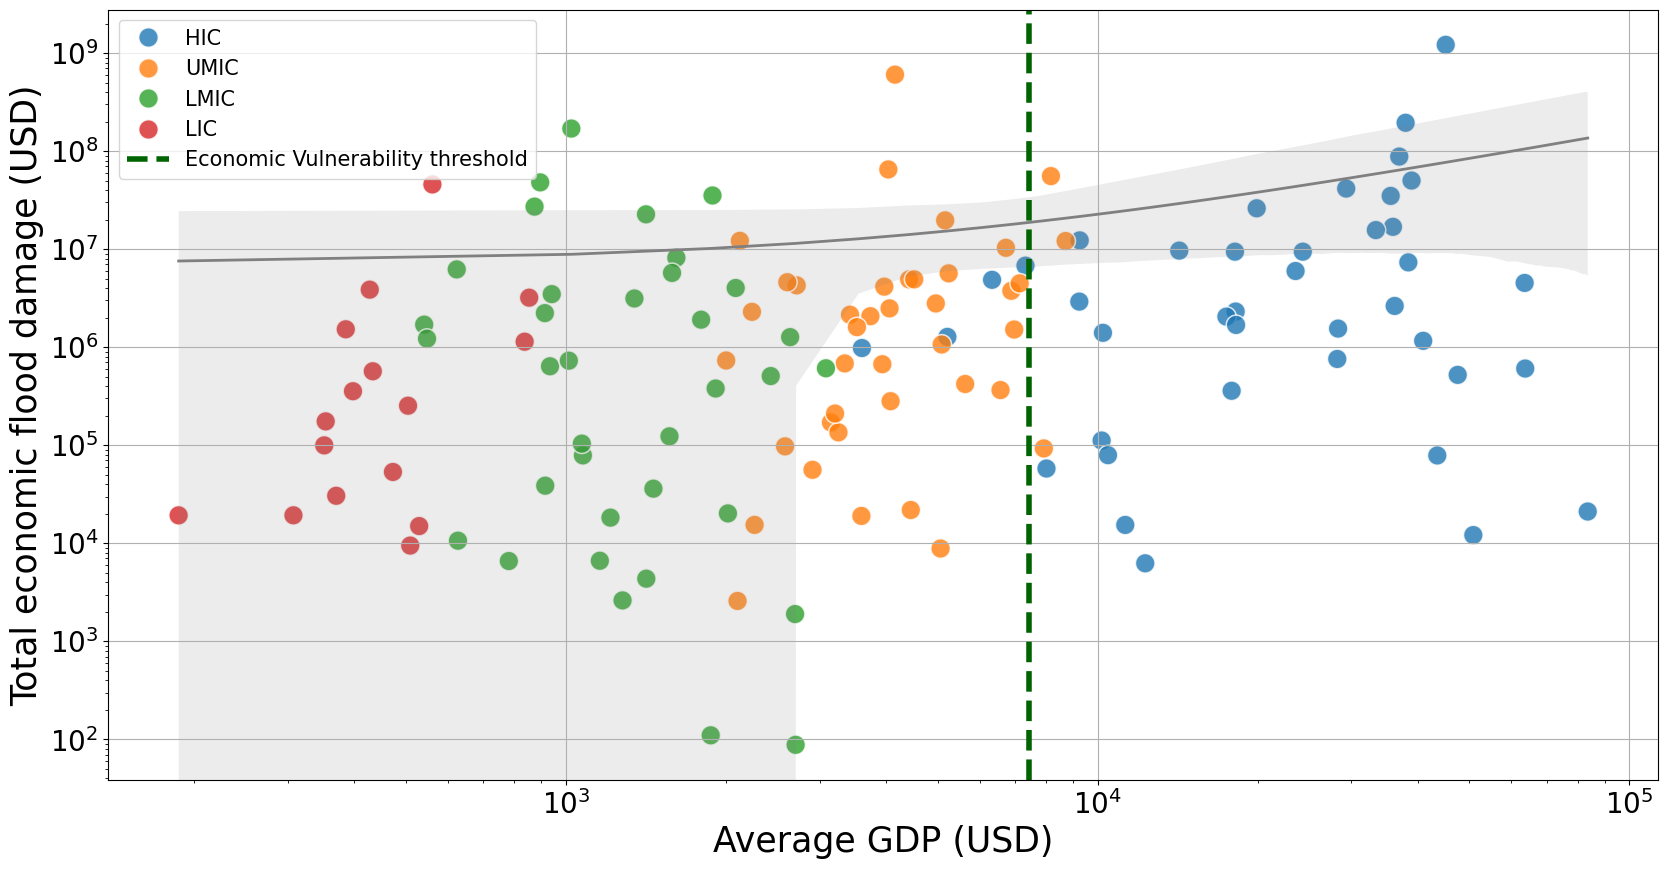

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the datasets
df1 = pd.read_csv('High_income_total_damage_per_country_1990_2022.csv')
df2 = pd.read_csv('Upper_middle_income_total_damage_per_country_1990_2022.csv')
df3 = pd.read_csv('Lower_middle_income_total_damage_per_country_1990_2022.csv')
df4 = pd.read_csv('Low_income_total_damage_per_country_1990_2022.csv')

df = pd.concat([df1, df2, df3, df4])

#df5 = pd.read_csv('High_income_trends_co2-emissions-vs-gdp.csv')
#df6 = pd.read_csv('Upper_middle_income_trends_co2-emissions-vs-gdp.csv')
#df7 = pd.read_csv('Lower_middle_income_trends_co2-emissions-vs-gdp.csv')
#df8 = pd.read_csv('Low_income_trends_co2-emissions-vs-gdp.csv')
Df= pd.read_csv('Average_gdp.csv')

#Df = pd.concat([df5, df6, df7, df8])

# Merge the datasets on the 'Entity' column
merged_df = pd.merge(df, Df, on='Entity')

# Select relevant columns and add an income category column
data = merged_df[['Total Damage per Country (\'000 US$)', 'GDP', 'Income_y','Entity']].dropna()

# Define the independent and dependent variables
X = data['GDP']
y = data['Total Damage per Country (\'000 US$)'] * 1000

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the Poisson regression model
# Fit the Negative Binomial regression model
nb_model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()
# Print the summary of the model, including the exact p-value
summary = nb_model.summary()
print(summary)

# Create the scatter plot
plt.figure(figsize=(20, 10))

# Define a color palette for the income categories using nature-friendly colors
palette = {
    'HIC': '#1f77b4',  # Blue
    'UMIC': '#ff7f0e',  # Orange
    'LMIC': '#2ca02c',  # Green
    'LIC': '#d62728'  # Red
}

# Create a scatter plot with color based on income category
sns.scatterplot(data=data, y='Total Damage per Country (\'000 US$)', x='GDP', 
                hue='Income_y', palette=palette, s=200, alpha=0.8)

# Add a regression line
sns.regplot(data=data, y='Total Damage per Country (\'000 US$)', x='GDP', scatter=False, color='grey', line_kws={"linewidth": 2})

# Adding vertical line for reference
plt.axvline(x=7433.0, color='darkgreen', linestyle='--', label='Economic Vulnerability threshold', linewidth=4)

# Adding legend to display labels
plt.legend(fontsize=15)

# Add titles and labels
plt.xlabel('Average GDP (USD)', fontsize=25)
plt.ylabel('Total economic flood damage (USD)', fontsize=25)

# Increase tick label sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xscale('log')  # Optional: Use logarithmic scale for better visualization
plt.yscale('log')  # Optional: Use logarithmic scale for better visualization
plt.grid(True)

# Save the plot
plt.savefig('2_plot.png', bbox_inches='tight')

# Count the number of countries below the threshold for each income category
# Count the number of countries below the threshold for each income category
# Count the number of countries below the threshold for each income category
# Count the number of countries below the threshold for each income category
threshold = 7433.0
below_threshold_counts = data[data['GDP'] < threshold].groupby('Income_y').size()

# Print the counts and the names of the countries below the threshold
for income_category, count in below_threshold_counts.items():
    countries_below_threshold = data[(data['Income_y'] == income_category) & 
                                     (data['GDP'] < threshold)]['Entity']
    print(f"{count} out of {data[data['Income_y'] == income_category].shape[0]} {income_category} countries are below the threshold.")
    print(f"Countries below the threshold for {income_category}: {', '.join(countries_below_threshold)}")

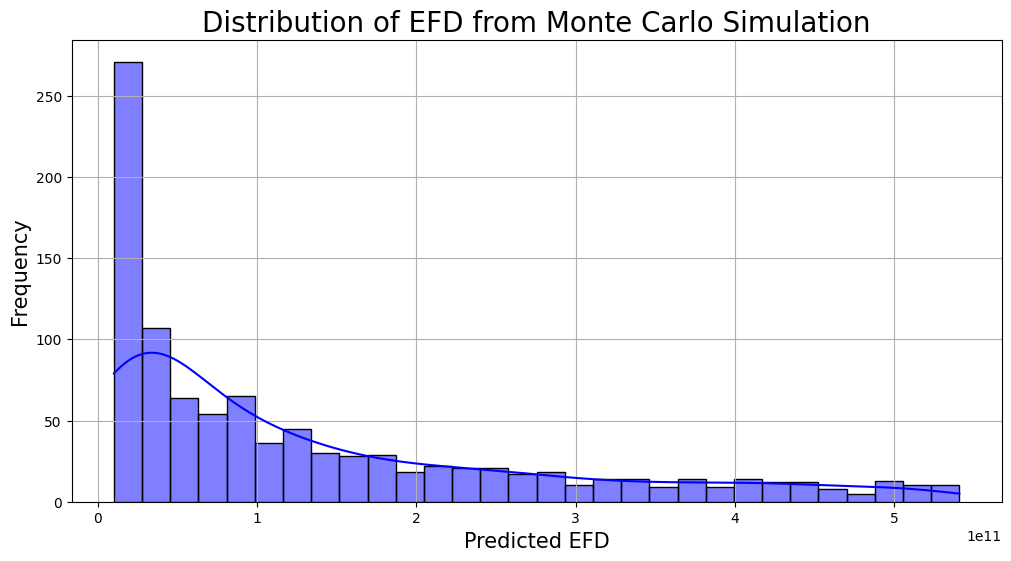

In [6]:
import numpy as np

# Number of iterations for the Monte Carlo simulation
n_iterations = 1000

# Generate random GDP values based on the existing data
gdp_min = data['GDP'].min()
gdp_max = data['GDP'].max()
random_gdp = np.random.uniform(gdp_min, gdp_max, n_iterations)

# Prepare a DataFrame for the random GDP values
random_df = pd.DataFrame({'GDP': random_gdp})

# Add a constant for the intercept
random_X = sm.add_constant(random_df)

# Predict CO₂ emissions using the fitted Poisson model
predicted_efd= nb_model.predict(random_X)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Random GDP': random_gdp,
    'Predicted EFD': predicted_efd
})

# Plotting the results
plt.figure(figsize=(12, 6))
sns.histplot(results_df['Predicted EFD'], bins=30, kde=True, color='blue')
plt.title('Distribution of EFD from Monte Carlo Simulation', fontsize=20)
plt.xlabel('Predicted EFD', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True)
plt.savefig('EFD_vs_GDP.png')
plt.show()

In [17]:
correlation = results_df['Random GDP'].corr(results_df['Predicted EFD'])
print(f'Correlation between GDP and Predicted CO₂ Emissions: {correlation}')

Correlation between GDP and Predicted CO₂ Emissions: 0.9012262216410498


In [30]:
import pandas as pd

# List of countries
countries1 = [
    "Uruguay", "Afghanistan", "Burkina Faso", "Burundi", "Chad", 
    "Congo Dem Rep", "Ethiopia", "Madagascar", "Malawi", "Mozambique", 
    "Niger", "Rwanda", "Somalia", "Sudan", "Uganda", "Yemen", 
    "Angola", "Bangladesh", "Benin", "Bolivia", "Cambodia", 
    "Cameroon", "Comoros", "Congo", "Djibouti", "Eswatini", 
    "Ghana", "Haiti", "Honduras", "India", "Kenya", 
    "Mauritania", "Morocco", "Myanmar", "Nepal", "Nicaragua", 
    "Nigeria", "Pakistan", "Papua New Guinea", "Philippines", 
    "Samoa", "Senegal", "Solomon Islands", "Sri Lanka", 
    "Tajikistan", "Tanzania", "Vietnam", "Zambia", 
    "Albania", "Armenia", "Belize", "Colombia", "Costa Rica", 
    "El Salvador", "Fiji", "Georgia", "Guatemala", 
    "Indonesia", "Paraguay", "Peru"
]

# Create a DataFrame with GHG thresholds (example values)
ghg_thresholds = [0] * len(countries4)  # Replace with actual GHG threshold values if available
data = {'Country': countries4, 'GHG Threshold': ghg_thresholds}

df = pd.DataFrame(data)

# Save to CSV
df.to_csv('countries_ghg_thresholds.csv', index=False)

In [26]:
countries2 = [
    "Bulgaria", "Guyana", "Romania", "Russia", "Afghanistan", "Burkina Faso", 
    "Burundi", "Chad", "North Korea", "Congo Dem Rep", "Ethiopia", "Madagascar", 
    "Malawi", "Mozambique", "Niger", "Rwanda", "Somalia", "Sudan", "Uganda", 
    "Yemen", "Angola", "Bangladesh", "Benin", "Bolivia", "Cambodia", "Cameroon", 
    "Comoros", "Congo", "Djibouti", "Egypt", "Eswatini", "Ghana", "Haiti", 
    "Honduras", "India", "Jordan", "Kenya", "Mauritania", "Morocco", "Myanmar", 
    "Nepal", "Nicaragua", "Nigeria", "Pakistan", "Papua New Guinea", "Philippines", 
    "Samoa", "Senegal", "Solomon Islands", "Sri Lanka", "Tajikistan", "Tunisia", 
    "Tanzania", "Vietnam", "Zambia", "Zimbabwe", "Albania", "Algeria", "Armenia", 
    "Azerbaijan", "Belarus", "Belize", "Bosnia", "Botswana", "Brazil", "China", 
    "Colombia", "Costa Rica", "Cuba", "Dominican Republic", "Ecuador", 
    "El Salvador", "Fiji", "Georgia", "Guatemala", "Indonesia", "Iraq", 
    "Jamaica", "Kazakhstan", "Malaysia", "Mauritius", "Mongolia", "North Macedonia", 
    "Paraguay", "Peru", "Moldova", "Serbia", "South Africa", "Suriname", 
    "Thailand", "Turkmenistan", "Turkey", "Ukraine"
]

In [28]:

# Find the intersection of both lists
common_countries = list(set(countries1) & set(countries2))

# Print the common countries
print("Countries in both lists:", common_countries)

Countries in both lists: ['Zambia', 'Somalia', 'Burundi', 'Nigeria', 'Cambodia', 'Cameroon', 'Angola', 'Benin', 'Mauritania', 'Philippines', 'Niger', 'Madagascar', 'Tajikistan', 'Eswatini', 'Fiji', 'Solomon Islands', 'Indonesia', 'Haiti', 'India', 'Chad', 'Kenya', 'Nicaragua', 'Yemen', 'Sri Lanka', 'Congo', 'Pakistan', 'Djibouti', 'Senegal', 'Tanzania', 'Burkina Faso', 'Peru', 'Bangladesh', 'Paraguay', 'Vietnam', 'Albania', 'Morocco', 'Comoros', 'Costa Rica', 'Armenia', 'Congo Dem Rep', 'Malawi', 'Ghana', 'Uganda', 'Ethiopia', 'Sudan', 'El Salvador', 'Afghanistan', 'Bolivia', 'Mozambique', 'Honduras', 'Colombia', 'Belize', 'Rwanda', 'Nepal', 'Georgia', 'Guatemala', 'Myanmar', 'Samoa', 'Papua New Guinea']


In [29]:
len(common_countries)

59

/hkfs/home/haicore/hgf_dlr/hgf_uyx7543/myEnv/lib64/python3.9/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                          Generalized Linear Model Regression Results                          
Dep. Variable:     Total Damage per Country ('000 US$)   No. Observations:                  131
Model:                                             GLM   Df Residuals:                      129
Model Family:                         NegativeBinomial   Df Model:                            1
Link Function:                                     Log   Scale:                          1.0000
Method:                                           IRLS   Log-Likelihood:                -3102.5
Date:                                 Wed, 12 Mar 2025   Deviance:                       582.34
Time:                                         11:19:45   Pearson chi2:                     534.
No. Iterations:                                    100   Pseudo R-squ. (CS):             0.9045
Covariance Type:                             nonrobust                                         
                 coef    std err        

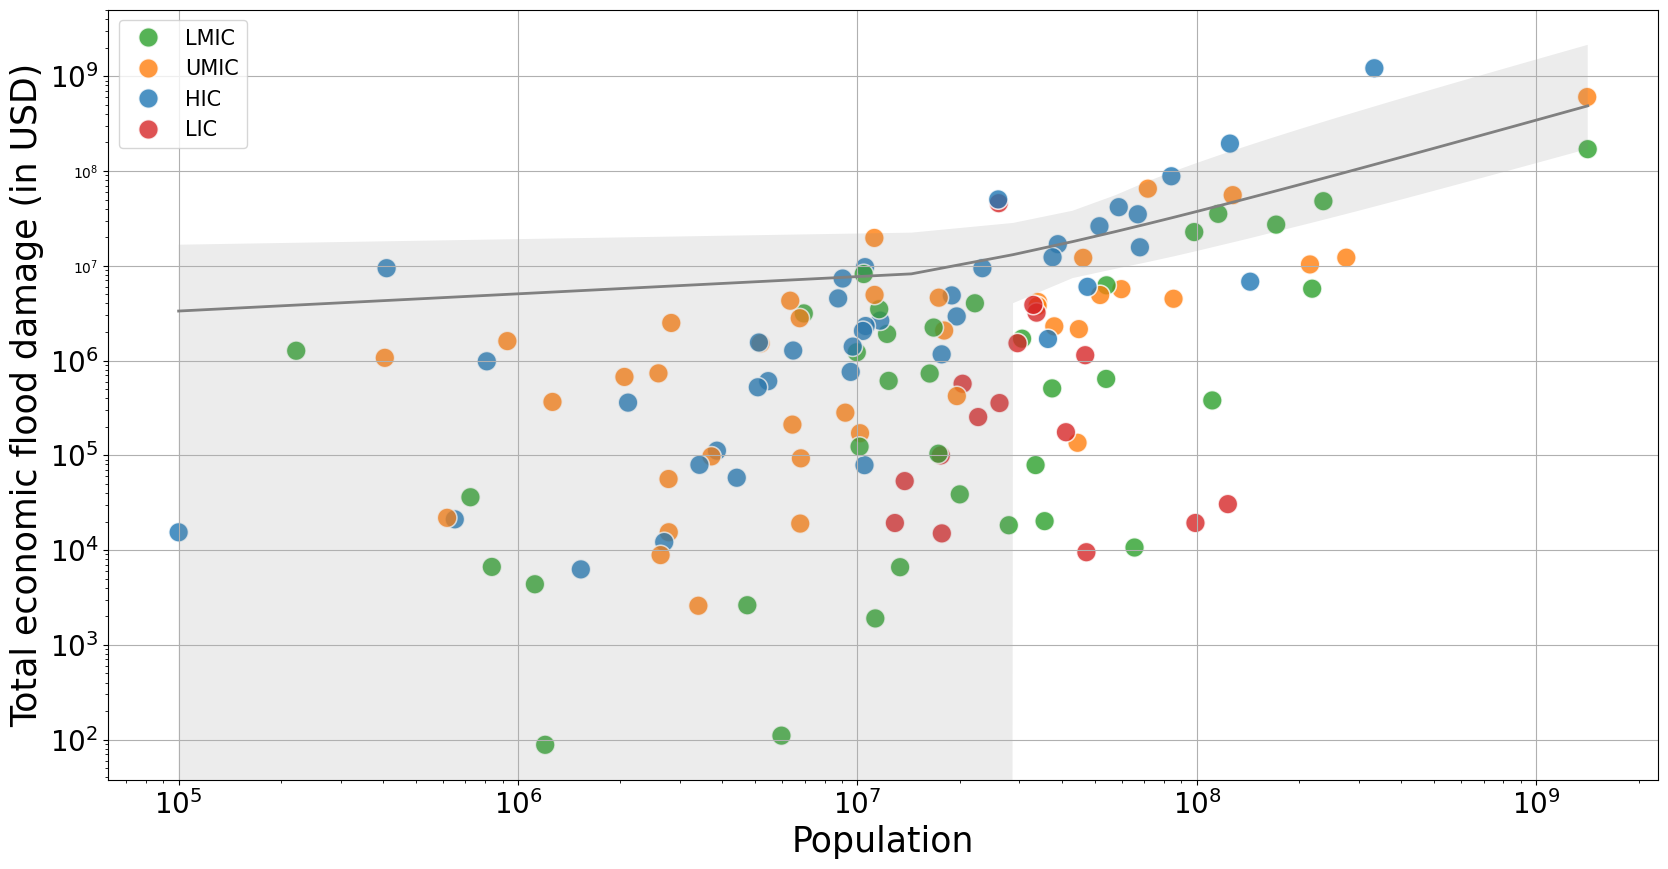

In [3]:
# Load the dataset
data = pd.read_csv('countries_population.csv')

# Define the independent and dependent variables
X = data['Population']
y = data['Total Damage per Country (\'000 US$)']*1000

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the Negative Binomial regression model
nb_model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()

# Print the summary of the model, including the exact p-value
summary = nb_model.summary()
print(summary)

# Create the scatter plot
plt.figure(figsize=(20, 10))

# Define a color palette for the income categories using nature-friendly colors
palette = {
    'HIC': '#1f77b4',  # Blue
    'UMIC': '#ff7f0e',  # Orange
    'LMIC': '#2ca02c',  # Green
    'LIC': '#d62728'  # Red
}

# Create a scatter plot with color based on income category
sns.scatterplot(data=data, y='Total Damage per Country (\'000 US$)', x='Population', 
                hue='Income', palette=palette, s=200, alpha=0.8)

# Add a regression line
sns.regplot(data=data, y='Total Damage per Country (\'000 US$)', x='Population', scatter=False, color='grey', line_kws={"linewidth": 2})


# Adding legend to display labels
plt.legend(fontsize=15)

# Add titles and labels
plt.xlabel('Population', fontsize=25)
plt.ylabel('Total economic flood damage (in USD)', fontsize=25)

# Increase tick label sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xscale('log')  # Optional: Use logarithmic scale for better visualization
plt.yscale('log')  # Optional: Use logarithmic scale for better visualization
plt.grid(True)

# Save the plot
plt.savefig('regression_plot.png', bbox_inches='tight')
plt.show()

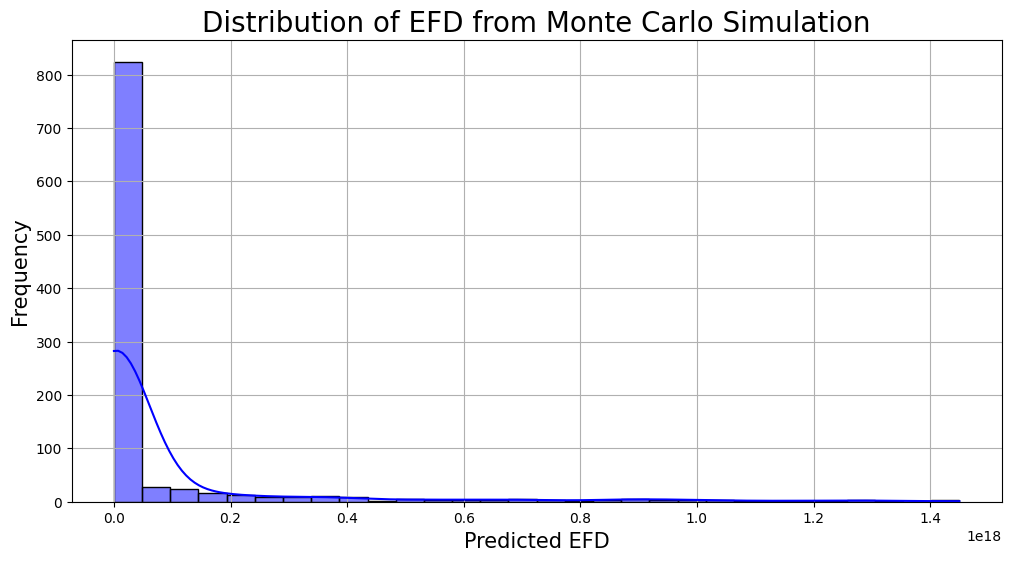

In [4]:
# Number of iterations for the Monte Carlo simulation
n_iterations = 1000

# Generate random CO₂ emission values based on the existing data
pop_min = data['Population'].min()
pop_max = data['Population'].max()
random_pop = np.random.uniform(pop_min, pop_max, n_iterations)

# Prepare a DataFrame for the random CO₂ emission values
random_df = pd.DataFrame({'Population': random_pop})

# Add a constant for the intercept (required for statsmodels)
random_X = sm.add_constant(random_df)

# Predict EFD (Expected Frequency Distribution) using the fitted Poisson model
# Ensure 'nb_model' is a previously fitted Poisson regression model
predicted_efd = nb_model.predict(random_X)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Random population': random_pop,
    'Predicted EFD': predicted_efd
})

# Plotting the results
plt.figure(figsize=(12, 6))
sns.histplot(results_df['Predicted EFD'], bins=30, kde=True, color='blue')
plt.title('Distribution of EFD from Monte Carlo Simulation', fontsize=20)
plt.xlabel('Predicted EFD', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True)
plt.savefig('EFD_vs_Pop.png')
plt.show()

In [5]:
correlation = results_df['Random population'].corr(results_df['Predicted EFD'])
print(f'Correlation between GDP and Predicted CO₂ Emissions: {correlation}')

Correlation between GDP and Predicted CO₂ Emissions: 0.5305623449458002
